# Descriptive Statistics Review

## Context

![img](./diamonds.jpg)


The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. 

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [70]:
diamonds=pd.read_csv(r'/Users/nadimsaad/Desktop/IRONHACK/Module 2/Week 4/Day 20/Project 4/diamonds.csv')

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [3]:
diamonds.head(5)
# we have 11 columns

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.info()
# we have 2 int variable columns (unnamed and price)
# 6 float variable columns (carat, depth, table, x, y, z)
# 3 object variable columns (cut, color, clarity)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [6]:
# dataset lines are 53940
# Here we can see most of the coobkoot infos i.e. price ranging from 326 to 18823 $
# Quality of the cut, the color and the clarity do not appear with the describe function


It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [7]:
diamonds.shape # 53940 rows and 11 columns

(53940, 11)

The `clarity` column is confusing because we are not diamond experts. Let's create a new column with a new scale that is more understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [8]:
diamonds['clarity']

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: object

In [71]:
diamonds['clarity_scale']= np.where(diamonds["clarity"] == 'I1', 0,
                                    np.where(diamonds["clarity"] == 'SI2', 1,
                                    np.where(diamonds["clarity"] == 'SI1', 2,
                                    np.where(diamonds["clarity"] == 'VS2', 3,
                                    np.where(diamonds["clarity"] == 'VS1', 4,
                                    np.where(diamonds["clarity"] == 'VVS2',5,
                                    np.where(diamonds["clarity"] == 'VVS1',6,
                                    np.where(diamonds["clarity"] == 'IF',7,8))))))))
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1


In [10]:
print(diamonds['color'].value_counts())

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [129]:
diamonds['color_scale']= np.where(diamonds["color"] == 'D', 0,
                                    np.where(diamonds["color"] == 'E', 1,
                                    np.where(diamonds["color"] == 'F', 2,
                                    np.where(diamonds["color"] == 'G', 3,
                                    np.where(diamonds["color"] == 'H', 4,
                                    np.where(diamonds["color"] == 'I', 5,
                                    np.where(diamonds["color"] == 'J', 6,7)))))))
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,1
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,1
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,1
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,0
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,0
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,4


In [12]:
print(diamonds['color_scale'].value_counts())

0    11292
1     9797
2     9542
3     8304
4     6775
5     5422
6     2808
Name: color_scale, dtype: int64


With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [13]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     53940 non-null  int64  
 1   carat          53940 non-null  float64
 2   cut            53940 non-null  object 
 3   color          53940 non-null  object 
 4   clarity        53940 non-null  object 
 5   depth          53940 non-null  float64
 6   table          53940 non-null  float64
 7   price          53940 non-null  int64  
 8   x              53940 non-null  float64
 9   y              53940 non-null  float64
 10  z              53940 non-null  float64
 11  clarity_scale  53940 non-null  int64  
 12  color_scale    53940 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 5.4+ MB


In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [ ]:
# we have 6 float columns, 4 integer and 3 object

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [130]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,clarity_scale,color_scale
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53932.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.732007,5.734159,3.539735,3.051020,2.594197
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.119670,1.113273,0.692051,1.647136,1.701105
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,1.000000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000,4.000000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,19.278421,8.060000,7.000000,6.000000


You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [131]:
diamonds[diamonds['x']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale


In [132]:
diamonds[diamonds['y']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale


In [17]:
diamonds[diamonds['z']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,1,0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0,3
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,1,0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,1,2
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0,0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,1,2
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,3,3
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,3,0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,4,0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,1,3


As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [133]:
diamonds[diamonds['z']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale


In [134]:
def calculate_z(i):
    z=diamonds['depth'][i]*((diamonds['x'][i])+(diamonds['y'][i]))/(2*100)
    return z
calculate_z(2)

2.31014

In [76]:
#find the index of rows to fix
condition_z = (diamonds['z']==0) & (diamonds['y']!=0) & (diamonds['x']!=0)
n_ind = diamonds.loc[lambda x: condition_z==True].index.tolist()
n_ind


[2207,
 2314,
 4791,
 5471,
 10167,
 13601,
 24394,
 26123,
 27112,
 27503,
 27739,
 51506]

In [77]:
for i in n_ind:
    print(i)
    x=(calculate_z(i))
    diamonds.at[i,'z']=x
   

2207
2314
4791
5471
10167
13601
24394
26123
27112
27503
27739
51506


In [135]:
diamonds[diamonds['z']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale


In [36]:
dd=pd.DataFrame()
for i in range(len (diamonds['z'])):
    
    if diamonds['x'][i]!=0 and diamonds['z'][i]==0:
                print(i)
                
   diamonds[(diamonds['x']!=0) & (diamonds['y']!=0) & (diamonds['z']==0)] = diamonds.apply(lambda x: calculate_z(diamonds['x'], diamonds['y'], diamonds['depth']))
diamonds[diamonds['z']==0]
                
                     


In [34]:
dd

""


In [22]:
diamonds[diamonds['z']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0,1,2
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0,3,3
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0,4,0
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0,3,0
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0,6,4
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0,1,3
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0,1,2
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0,1,2


In [ ]:
print(diamonds['y'])

**Apply it just to the rows with incorrect values**

In [136]:
diamonds['z']= np.where((diamonds['z']==0) & (diamonds['x']!=0) & (diamonds['y']!=0), calculate_z(diamonds, 'depth', 'x','y'), diamonds['z'])

TypeError: calculate_z() takes 1 positional argument but 4 were given

In [ ]:
diamonds[diamonds['z']==0]

In [138]:
# I deleted the unique remaining row in which x and z equal zero for which we wont be able to calculate the z)

diamonds.drop(labels=11182, axis=0)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,1
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,1
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,1
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,0
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,0
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,4


In [139]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,clarity_scale,color_scale
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53932.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.732007,5.734159,3.539735,3.051020,2.594197
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.119670,1.113273,0.692051,1.647136,1.701105
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,1.000000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000,4.000000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,19.278421,8.060000,7.000000,6.000000


If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [140]:
diamonds['x']=np.where(diamonds['x'] == '0', np.nan, diamonds['x'])
diamonds['y']=np.where(diamonds['y'] == '0', np.nan, diamonds['y'])
diamonds['z']=np.where(diamonds['z'] == '0', np.nan, diamonds['z'])

In [141]:
diamonds['x'].replace(0,np.nan,inplace=True)
diamonds['y'].replace(0,np.nan,inplace=True)
diamonds['z'].replace(0,np.nan,inplace=True)

In [ ]:
#your code here

----
# Bonus: check the new z values
Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

Let's check the data again with the `describe()` method.

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [142]:
diamonds.isna().sum()

Unnamed: 0       0
carat            0
cut              0
color            0
clarity          0
depth            0
table            0
price            0
x                8
y                7
z                8
clarity_scale    0
color_scale      0
dtype: int64

In [143]:
# deleting the rows where all x, y and z values are equal to 0

indexNames = diamonds[ (diamonds['x'] == 0) & (diamonds['y'] == 0 ) & (diamonds['z'] == 0) ].index
diamonds.drop(indexNames , inplace=True)

In [144]:
diamonds.isna().sum()

Unnamed: 0       0
carat            0
cut              0
color            0
clarity          0
depth            0
table            0
price            0
x                8
y                7
z                8
clarity_scale    0
color_scale      0
dtype: int64

# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [145]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,clarity_scale,color_scale
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53932.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.732007,5.734159,3.539735,3.051020,2.594197
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.119670,1.113273,0.692051,1.647136,1.701105
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,1.000000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000,4.000000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,19.278421,8.060000,7.000000,6.000000


In [ ]:
# I don't have zero values anymore and my data is basically ready to be plotted

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

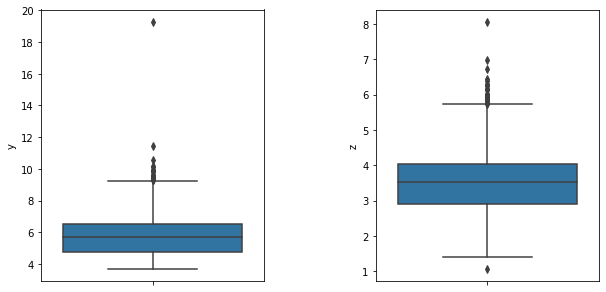

In [146]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [147]:
diamonds[(diamonds.z)>10]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [148]:
diamonds.at[48410,'z']=0

In [104]:
# I tried to apply the calculate_z function in the following ways but none worked, so i did without the function

# diamonds.at[48410,'z']= calculate_z (diamonds.at[48410,'z'], diamonds.at[48410,'depth'], diamonds.at[48410,'x'],diamonds.at[48410,'y']), diamonds.at[48410,'z']
# diamonds.at[48410,'z']=calculate_z(diamonds.at[48410,'depth'][i]*((diamonds.at[48410,'x'][i])+(diamonds.at[48410,'y'][i]))/(2*100))
# diamonds.at[48410,'z']=calculate_z(diamonds.at['depth'][48410]*((diamonds.at['x'][48410])+(diamonds.at['y'][48410]))/(2*100))
# diamonds.at[48410,'z']=calculate_z(diamonds.apply(lambda x: calculate_z(diamonds.at[48410,'x'], diamonds.at[48410,'y'], diamonds.at[48410,'depth'])))

In [149]:
diamonds.at[48410,'z']=diamonds.at[48410,'depth']*((diamonds.at[48410,'x'])+(diamonds.at[48410,'y']))/(2*100)

Let's check if we actually corrected the outlier.

In [150]:
diamonds.loc[48410]

Unnamed: 0           48411
carat                 0.51
cut              Very Good
color                    E
clarity                VS1
depth                 61.8
table                 54.7
price                 1970
x                     5.12
y                     5.15
z                  3.17343
clarity_scale            4
color_scale              1
Name: 48410, dtype: object

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [ ]:
#your code here

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [151]:
diamonds[(diamonds.y)>10]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
24067,24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,19.278421,8.06,1,4
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.089508,6.17,0,5
27415,27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.572977,6.98,0,6
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.195532,6.72,0,6
49189,49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,11.419579,5.12,4,1


We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [152]:
def calculate_y(i):
    y=((diamonds['z'][i]*(2*100))/diamonds['depth'][i])-diamonds['x'][i]
    return y
calculate_y(2)

4.069507908611599

In [153]:
# Here too, I couldn't implement the calculate_y function grrr, so I implemented the formula on each row index that appeared above

diamonds['y']= np.where((diamonds['y']>10), calculate_y(diamonds, 'depth', 'x','z'), diamonds['y'])


TypeError: calculate_y() takes 1 positional argument but 4 were given

In [154]:
diamonds.at[24067,'y']=((diamonds.at[24067,'z']*(2*100))/diamonds.at[24067,'depth'])-diamonds.at[24067,'x']
diamonds.at[25998,'y']=((diamonds.at[25998,'z']*(2*100))/diamonds.at[25998,'depth'])-diamonds.at[25998,'x']
diamonds.at[27415,'y']=((diamonds.at[27415,'z']*(2*100))/diamonds.at[27415,'depth'])-diamonds.at[27415,'x']
diamonds.at[27630,'y']=((diamonds.at[27630,'z']*(2*100))/diamonds.at[27630,'depth'])-diamonds.at[27630,'x']
diamonds.at[49189,'y']=((diamonds.at[49189,'z']*(2*100))/diamonds.at[49189,'depth'])-diamonds.at[49189,'x']

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

In [155]:
diamonds[(diamonds.y)>10]
# all values have been altered as per my formula, however, the y values are still above 10

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
24067,24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,19.278421,8.06,1,4
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.089508,6.17,0,5
27415,27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.572977,6.98,0,6
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.195532,6.72,0,6
49189,49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,11.419579,5.12,4,1


Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

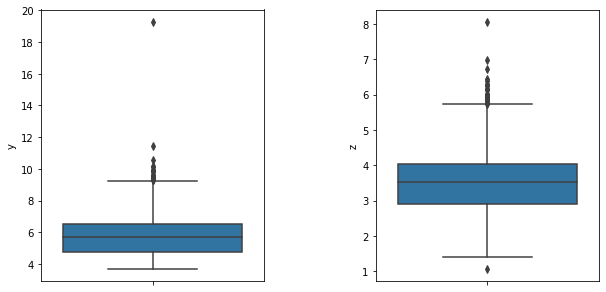

In [156]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

In [157]:
diamonds[(diamonds.z)>6]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
23644,23645,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.480000,6.38,0,4
24067,24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,19.278421,8.06,1,4
24328,24329,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.590000,6.03,0,4
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.089508,6.17,0,5
25999,26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.940000,6.24,0,6
26194,26195,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.840000,6.16,1,3
26431,26432,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.340000,6.27,0,0
26444,26445,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.940000,6.31,0,5
26534,26535,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.810000,6.13,0,5
27130,27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.850000,6.43,0,4


In [158]:
diamonds[(diamonds.z)<2]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
14635,14636,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07,2,2
20694,20695,1.53,Ideal,I,SI1,61.9,54.0,8971,7.43,7.50,1.53,2,5
21654,21655,1.41,Ideal,H,VS1,60.7,56.0,9752,7.31,7.22,1.41,4,4


## What do you think? Are these values more reasonable?

In [ ]:
#your thoughts here

y values are more reasonable than before. 
We still have one major outier in row 24067 and the remaing 4 to which we did the calculation formula here above
In the plot on the right, we have 13 values to which z is larger than 6 (4 out the 5 we dealt with to recalculate the y appeared above.
we also have few z values below 2 (3 records)
Considering that the above are very few compared the full dataset (53940 values in the dataset), we can see that they will affect it. Something to consider is to remove these values but best to check first with the client/ management

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [159]:
diamonds.to_csv('diamonds_clean.csv')